# Knowledge Discovery and Data Mining

###  Final Project
#### Course      : CS 513

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data cleaning tools
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# importing metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
# importing algorithms
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv('HR Employee Attrition.csv',na_values= "?")
df.head(25)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## EDA

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

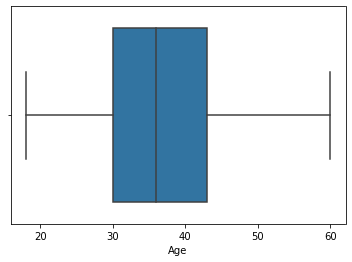

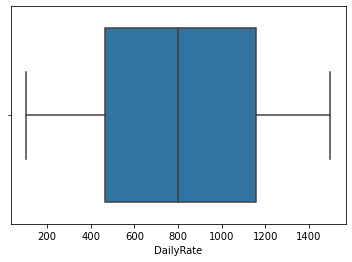

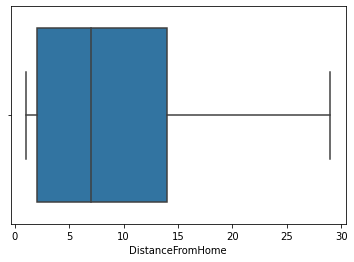

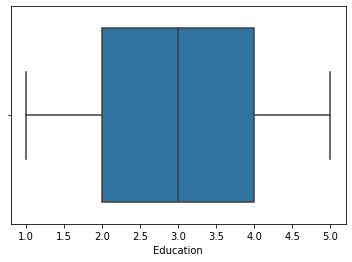

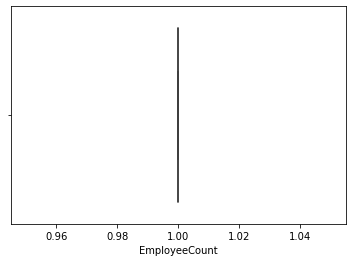

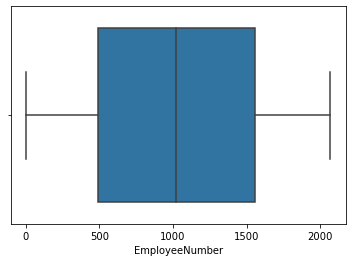

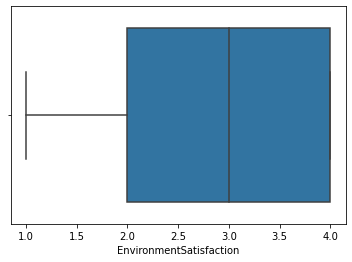

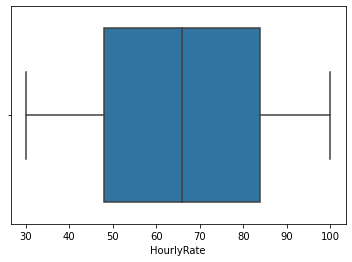

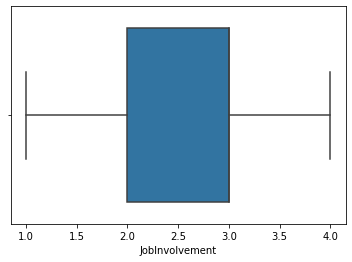

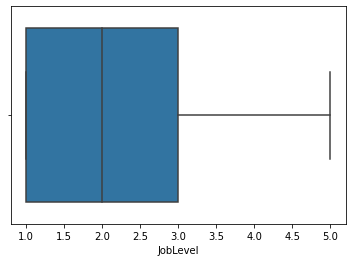

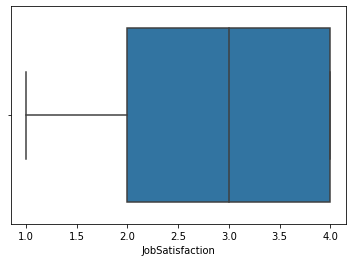

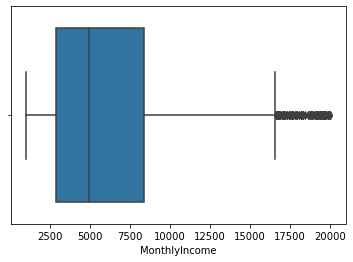

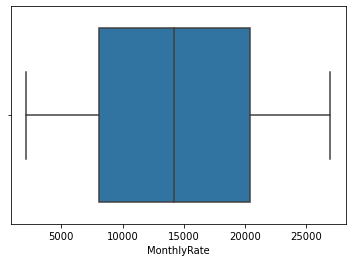

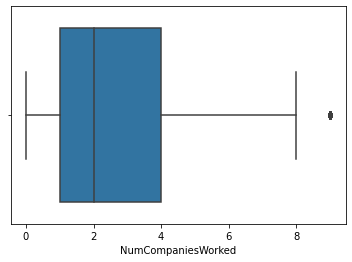

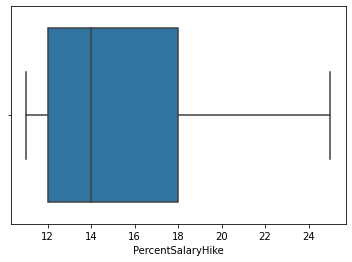

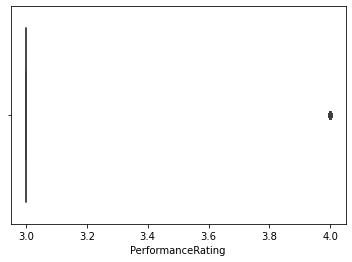

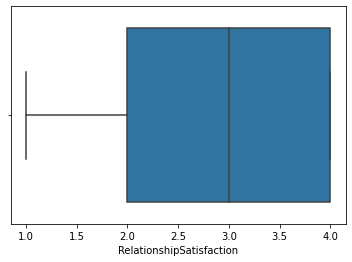

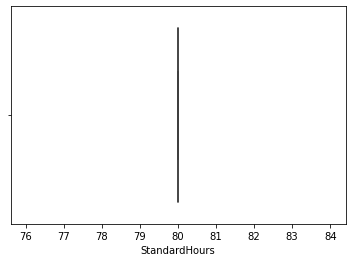

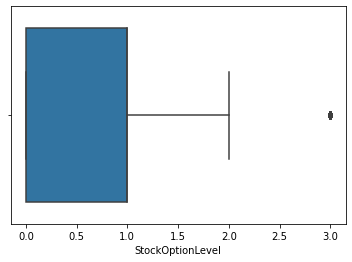

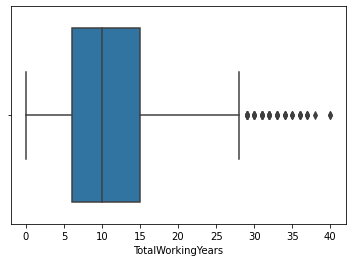

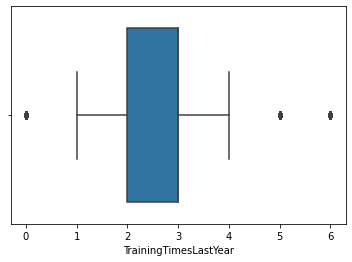

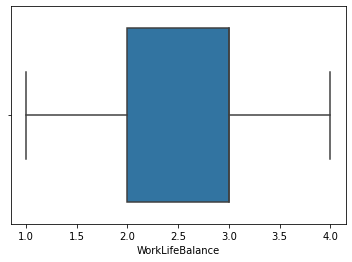

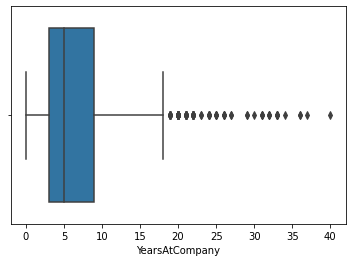

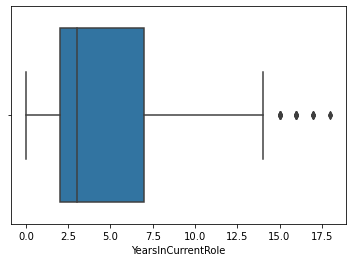

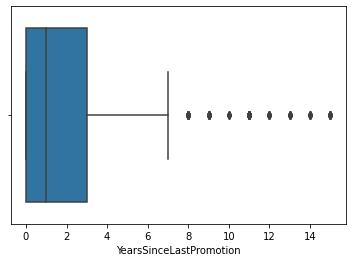

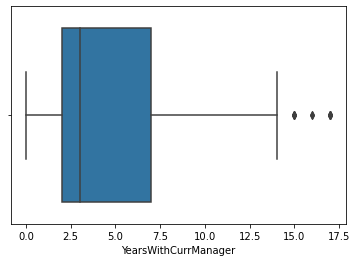

In [8]:
plt.rcParams.update({'figure.max_open_warning': 0})
for column in df:
    if df[column].dtype == "int64":
        plt.figure()
        sns.boxplot(x=df[column])

## Data Cleaning

In [9]:
df.drop(columns=['EmployeeCount', 'StandardHours'], inplace=True)

### Outliers

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## KNN

In [17]:
#df_knn = df.select_dtypes(include=[np.number])
#df_knn = df.iloc[:, [0,1,3,5,6,8,9,10,12,13,14,16,18,19,20,23,24,25,26,27,28,29,30,31,32,33,34]] + 
df_knn = df.select_dtypes(include=[np.number])
df_knn['Attrition'] = df['Attrition']
df_knn

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,1,2,94,3,2,4,...,1,0,8,0,1,6,4,0,5,Yes
1,49,279,8,1,2,3,61,2,2,2,...,4,1,10,3,3,10,7,1,7,No
2,37,1373,2,2,4,4,92,2,1,3,...,2,0,7,3,3,0,0,0,0,Yes
3,33,1392,3,4,5,4,56,3,1,3,...,3,0,8,3,3,8,7,3,0,No
4,27,591,2,1,7,1,40,3,1,2,...,4,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,1,17,3,3,5,2,0,3,No
1466,39,613,6,1,2062,4,42,2,3,1,...,1,1,9,5,3,7,7,1,7,No
1467,27,155,4,3,2064,2,87,4,2,2,...,2,1,6,0,3,6,2,0,3,No
1468,49,1023,2,3,2065,4,63,2,2,2,...,4,0,17,3,2,9,6,0,8,No


In [18]:
x = df_knn.iloc[:, df_knn.columns != 'Attrition']
y = df_knn['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [19]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### K=3

In [20]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [21]:
knn3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
knn3.score(x_test, y_test)

0.8299319727891157

In [23]:
y_pred3 = knn3.predict(x_test)

In [24]:
confusion_matrix(y_test, y_pred3)

array([[355,  16],
       [ 59,  11]])

In [25]:
f1_score(y_test, y_pred3, pos_label='No')

0.9044585987261147

### K=5

In [26]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn5.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
knn5.score(x_test, y_test)

0.8458049886621315

In [29]:
y_pred5 = knn5.predict(x_test)

In [30]:
confusion_matrix(y_test, y_pred5)

array([[364,   7],
       [ 61,   9]])

In [31]:
f1_score(y_test, y_pred5, pos_label='No')

0.914572864321608

### K=15

In [32]:
knn15 = KNeighborsClassifier(n_neighbors=15)

In [33]:
knn15.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [34]:
knn15.score(x_test, y_test)

0.8435374149659864

In [35]:
y_pred15 = knn15.predict(x_test)

In [36]:
confusion_matrix(y_test, y_pred15)

array([[371,   0],
       [ 69,   1]])

In [37]:
f1_score(y_test, y_pred15, pos_label='No')

0.9149198520345252

### K=SQRT(total number of samples)

In [38]:
import math
math.sqrt(len(y_train))

32.07802986469088

In [39]:
knn32 = KNeighborsClassifier(n_neighbors=32)

In [40]:
knn32.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=32)

In [41]:
knn32.score(x_test, y_test)

0.8435374149659864

In [42]:
y_pred32 = knn32.predict(x_test)

In [43]:
confusion_matrix(y_test, y_pred32)

array([[371,   0],
       [ 69,   1]])

In [44]:
f1_score(y_test, y_pred32, pos_label='No')

0.9149198520345252

Below this point it's is just me messing around, ignore

### Normalization and Standardization

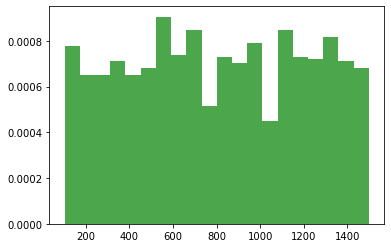

In [45]:
n, bins, patches = plt.hist(df['DailyRate'], 20, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)

In [ ]:
get_common_distributions()

In [ ]:
# Use the fitter library to determine the distrubtion of a given row. This allows us to know if we 
# should standardize (the data has a normal distribution) or normalize (the data does not have a 
# normal distrubtion)
f = Fitter(df['Age'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [ ]:
for column in df:
    if df[column].dtype == "int64":
        f = Fitter(df[column],
               distributions=['gamma',
                              'lognorm',
                              "beta",
                              "burr",
                              "norm"])
        f.fit()
        print(f.get_best())